Column names are Cell Index, Velocity[i] (m/s), Velocity[j] (m/s), Pressure (Pa), Turbulent Kinetic Energy (J/kg), Turbulent Dissipation Rate (m^2/s^3), Turbulent Viscosity (Pa-s), X (m), Y (m), Z (m)
Processed 40001 lines.


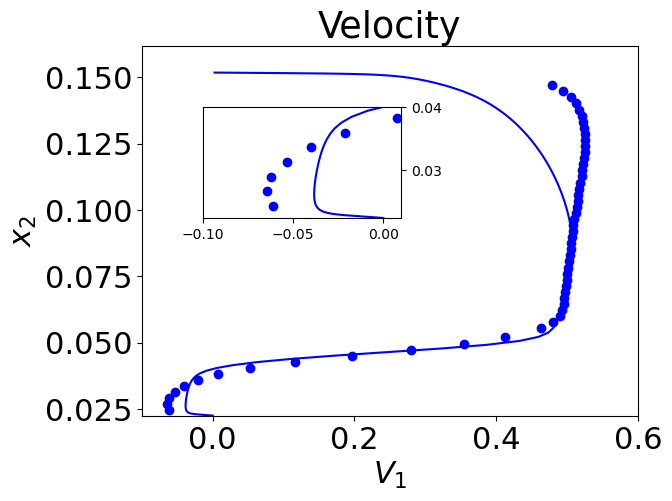

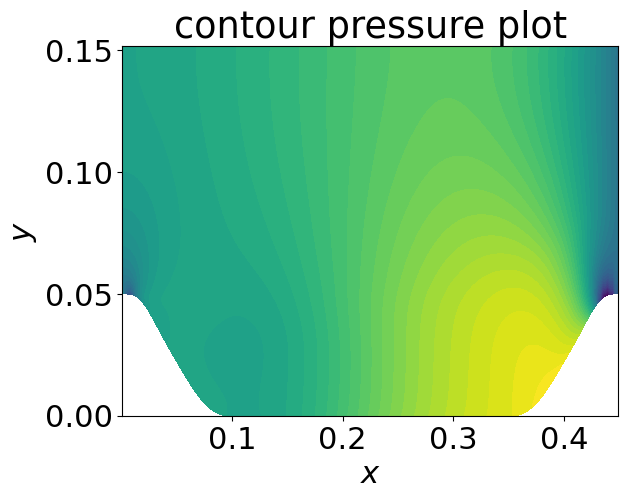

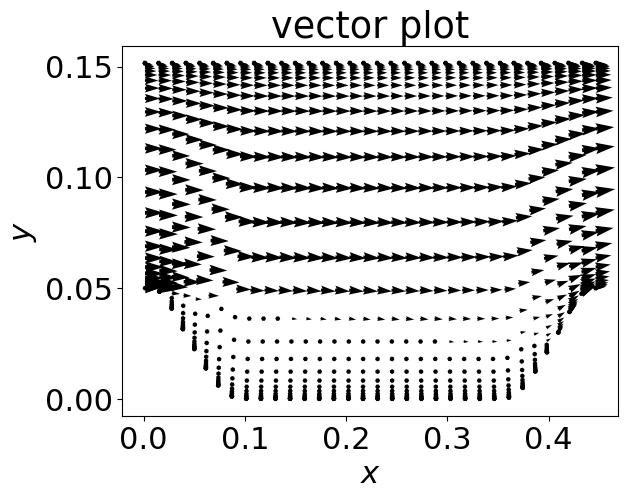

In [1]:
from pl_vect import *
import numpy as np
import math

## F3.1 Pressure

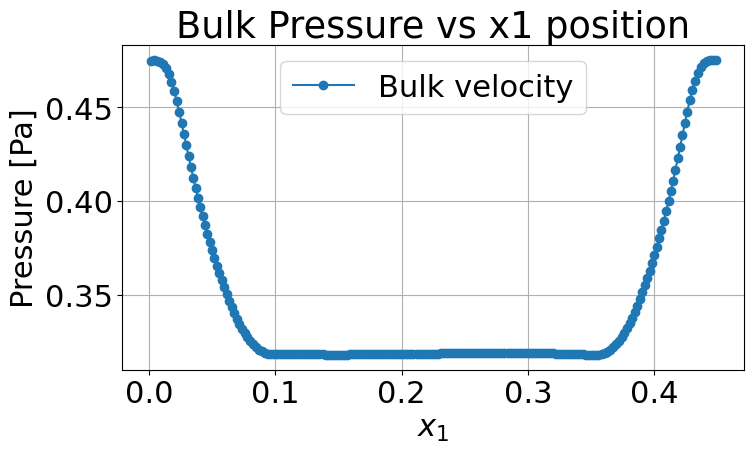

Vb inlet 0.47503920573386516 m/s
Vb outlet 0.4750701748555265 m/s


In [2]:
x2_min = x2_2d[:, 0]
x2_max = x2_2d[:, -1]


h_x1 = x2_max - x2_min


integral_V1_dx2 = np.trapz(v1_2d, x=x2_2d, axis=1)


V_b = integral_V1_dx2 / h_x1

x1_position = x1_2d[:, 0]

plt.figure(figsize=(8,5))
plt.plot(x1_position, V_b, 'o-', label='Bulk velocity')
plt.xlabel('$x_1$')
plt.ylabel('Pressure [Pa]')
plt.title('Bulk Pressure vs x1 position')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print('Vb inlet', V_b[0], 'm/s')
print('Vb outlet', V_b[-1], 'm/s')

ΔP_sim: 1.750e+01 Pa
ΔP_Bernoulli:  1.468e-02 Pa


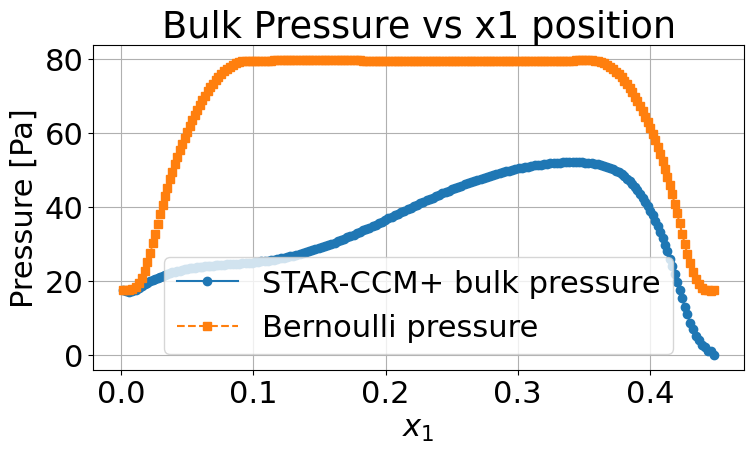

In [3]:
integral_P_dx2 = np.trapz(p_2d, x=x2_2d, axis=1)
P_bulk_sim = integral_P_dx2 / h_x1


# Calculating bernoulli pressure based on bulk velocity
rho = 998   # density of water in kg/m^3
P_ref = P_bulk_sim[0] # reference pressure at inlet
V_ref = V_b[0]  # reference bulk velocity at inlet

P_Bern = P_ref + 0.5 * rho * (V_ref**2 - V_b**2)


# Comparing pressure drops and creating plot
deltaP_sim = P_bulk_sim[0] - P_bulk_sim[-1]
deltaP_bern = P_Bern[0] - P_Bern[-1]
print(f"ΔP_sim: {deltaP_sim:.3e} Pa")
print(f"ΔP_Bernoulli:  {deltaP_bern:.3e} Pa")


plt.figure(figsize=(8,5))
plt.plot(x1_position, P_bulk_sim, 'o-', label='STAR-CCM+ bulk pressure')
plt.plot(x1_position, P_Bern, 's--', label='Bernoulli pressure')
plt.xlabel('$x_1$')
plt.ylabel('Pressure [Pa]')
plt.title('Bulk Pressure vs x1 position')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()





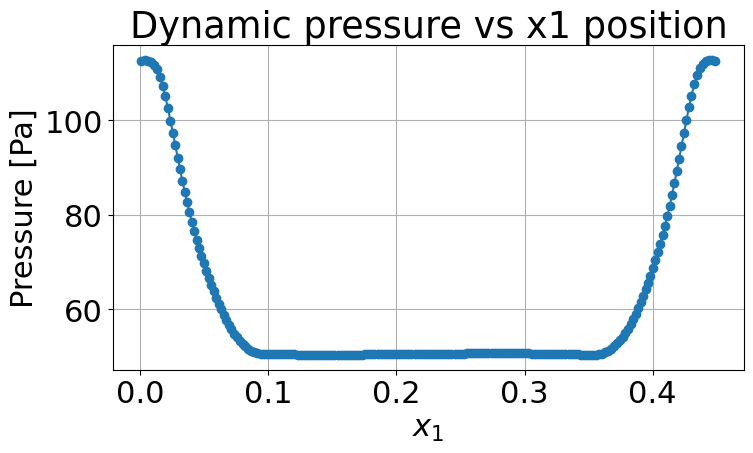

In [4]:
P_dyn = 0.5 * rho * V_b**2

plt.figure(figsize=(8,5))
plt.plot(x1_position, P_dyn, 'o-')
plt.xlabel('$x_1$')
plt.ylabel('Pressure [Pa]')
plt.title('Dynamic pressure vs x1 position')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Given Reynolds number
Re = 37000

# Define the function g(f) = 0 at the solution
def g(f):
    return 1.0 / math.sqrt(f) - 1.930 * math.log10(Re * math.sqrt(f)) + 0.537

# Secant method implementation
def secant(f0, f1, tol=1e-12, maxiter=100):
    for i in range(maxiter):
        g0, g1 = g(f0), g(f1)
        if abs(g1 - g0) < 1e-16:
            raise RuntimeError("Small denominator in secant method")
        # Secant formula
        f2 = f1 - g1 * (f1 - f0) / (g1 - g0)
        if abs(f2 - f1) < tol:
            print(f"Converged in {i+1} iterations")
            return f2
        f0, f1 = f1, f2
    raise RuntimeError("Secant method did not converge")

# Initial guesses
f_guess1 = 0.01
f_guess2 = 0.03

# Solving for fD
FfacD = secant(f_guess1, f_guess2)
print(f"f_D = {FfacD:.8f}")


H = 151.75e-3  # Height of inlet/outlet (meters)
hmax = 50e-3 # Depth of channel (meters)
R = 192.8e-3 # R in meters
L = 9*hmax
D_h = 2*H 

L = x1_2d[0, 0] - x1_2d[-1, 0]
deltaVbulk = V_b[0] - V_b[-1]
    
# All inputs are now scalars, so delta_p will be a SCALAR
delta_p = FfacD * (L / D_h) * (rho * deltaVbulk**2 / 2)
    

print(delta_p, 'Pa')



Converged in 7 iterations
f_D = 0.02236377
-1.578456800180555e-08 Pa


## F 3.2 Skinfriction

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


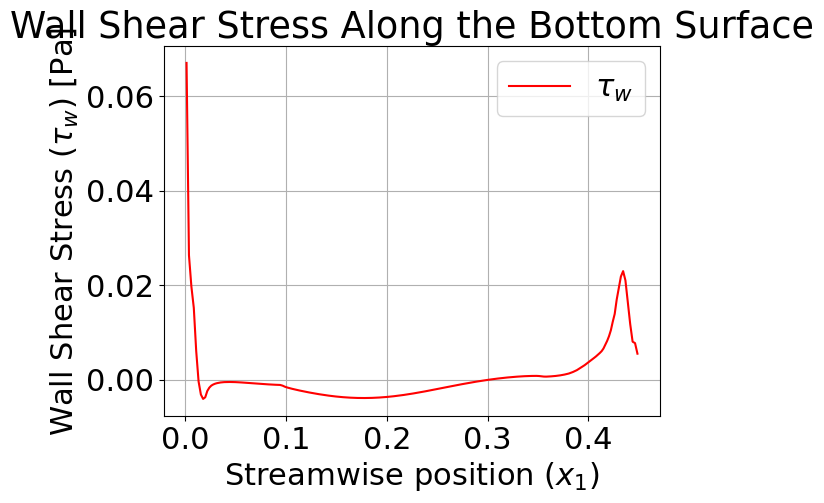

In [6]:
mu = 1.002e-5 # Dynamic viscosity of water at ~20°C in Pa·s

dv1_dx2_at_wall = v1_2d[:, 1] / (x2_2d[:, 1] - x2_2d[:, 0]) # Calculating the gradient at the wall using first two points

tau_w = mu * dv1_dx2_at_wall


fig4, ax4 = plt.subplots()
ax4.plot(x1_2d[:, 0], tau_w, 'r-', label='$\\tau_w$')
ax4.set_xlabel("Streamwise position ($x_1$)")
ax4.set_ylabel("Wall Shear Stress ($\\tau_w$) [Pa]")
ax4.set_title("Wall Shear Stress Along the Bottom Surface")
ax4.grid(True)
ax4.legend()
plt.savefig('tau_w_plot.eps')
plt.show() # Display all generated figures

Data type of wall_shear_stresses_top: float64
Data type of V_b: float64
Data type of wall_shear_stresses_top: float64
Data type of V_b: float64
(200,)


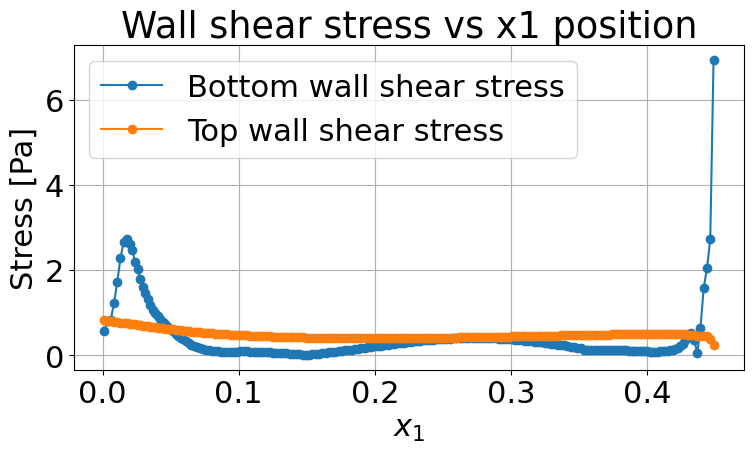

(200,)


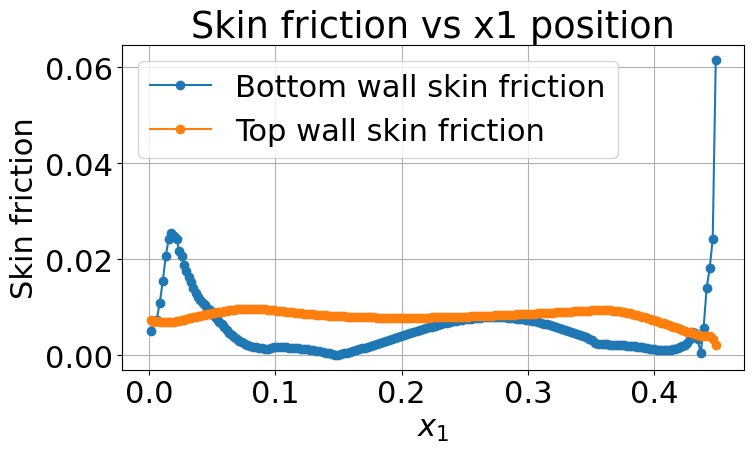

In [ ]:
import pandas as pd
import matplotlib.ticker as mticker


column_to_extract = 2 # The third column which contains wall shear stress magnitude


df = pd.read_csv('InternalTableBottom.csv')


wall_shear_stresses_bottom = df.iloc[:, column_to_extract].to_numpy()



print(f"Data type of wall_shear_stresses_top: {wall_shear_stresses_bottom.dtype}")
print(f"Data type of V_b: {V_b.dtype}")

df = pd.read_csv('InternalTableTop.csv')

wall_shear_stresses_top = df.iloc[:, column_to_extract].to_numpy()



print(f"Data type of wall_shear_stresses_top: {wall_shear_stresses_top.dtype}")
print(f"Data type of V_b: {V_b.dtype}")

print(np.shape(wall_shear_stresses_bottom))

plt.figure(figsize=(8,5))
plt.plot(x1_position, wall_shear_stresses_bottom, 'o-', label='Bottom wall shear stress')
plt.plot(x1_position, wall_shear_stresses_top, 'o-', label='Top wall shear stress')
plt.xlabel('$x_1$')
plt.ylabel('Stress [Pa]')
plt.title('Wall shear stress vs x1 position')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Cf_top = np.zeros(len(wall_shear_stresses_top))
Cf_bottom = np.zeros(len(wall_shear_stresses_bottom))

for i in range (len(wall_shear_stresses_top)):
    Cf_top[i] = wall_shear_stresses_top[i] / (0.5 * rho * V_b[i]**2)
    Cf_bottom[i] = wall_shear_stresses_bottom[i] / (0.5 * rho * V_b[i]**2)

print(np.shape(Cf_top))

plt.figure(figsize=(8,5))
plt.plot(x1_position, Cf_bottom, 'o-', label='Bottom wall skin friction')
plt.plot(x1_position, Cf_top, 'o-', label='Top wall skin friction')
plt.xlabel('$x_1$')
plt.ylabel('Skin friction')
plt.title('Skin friction vs x1 position')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()






## F 3.3 Vorticity

omega3 shape: (200, 202)
x1_2d shape: (200, 202)
x2_2d shape: (200, 202)


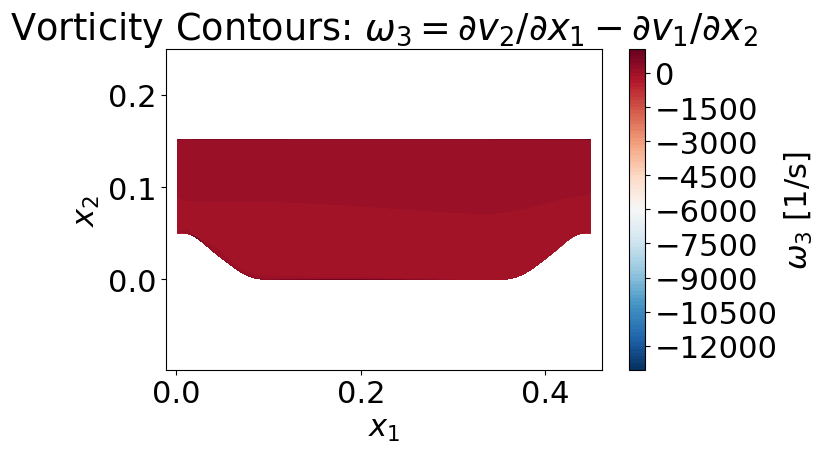

i = 8 Max vorticity at i = 981.2270098312783


In [ ]:
vorticity = dv2dx1_2d - dv1dx2_2d


print("omega3 shape:", vorticity.shape)

print("x1_2d shape:", x1_2d.shape)
print("x2_2d shape:", x2_2d.shape)


plt.figure(figsize=(8,5))
plt.clf()
contour = plt.contourf(x1_2d, x2_2d, vorticity, 100, cmap='RdBu_r')
plt.colorbar(contour, label=r'$\omega_3$ [1/s]')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Vorticity Contours: $\omega_3 = \partial v_2 / \partial x_1 - \partial v_1 / \partial x_2$')
plt.axis('equal')
plt.tight_layout()
plt.show()

max_i = np.unravel_index(np.argmax(vorticity, axis=None), vorticity.shape)[0]

print('i =', max_i, 'Max vorticity at i =', np.max(vorticity))

## F 3.4 Turbulent viscosity

array([[0.00000000e+00, 9.15011383e-04, 2.39017130e-02, ...,
        3.55797523e-03, 9.61783459e-05, 9.61783459e-05],
       [0.00000000e+00, 1.32415920e-04, 5.00914560e-03, ...,
        4.56802460e-03, 1.17826620e-04, 1.17826620e-04],
       [0.00000000e+00, 9.85976344e-05, 3.79998086e-03, ...,
        4.99334618e-03, 1.28835402e-04, 1.28835402e-04],
       ...,
       [0.00000000e+00, 8.43258124e-04, 3.15914664e-02, ...,
        3.40272395e-03, 8.76669590e-05, 8.76669590e-05],
       [0.00000000e+00, 8.55710001e-04, 3.20940246e-02, ...,
        3.39321750e-03, 8.74240759e-05, 8.74240759e-05],
       [0.00000000e+00, 8.85131233e-04, 3.32124614e-02, ...,
        3.41652714e-03, 8.80334253e-05, 8.80334253e-05]])

(200, 202)


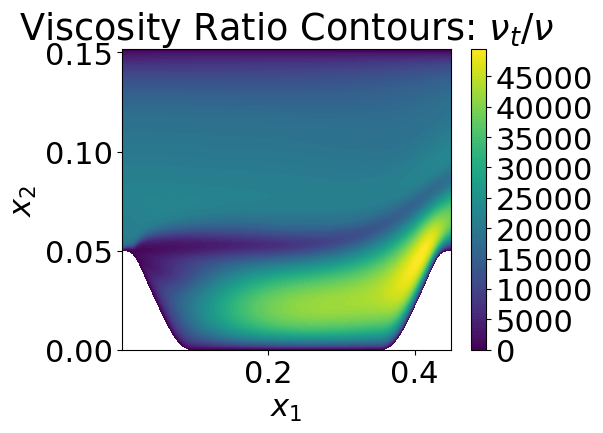

In [92]:
ratio = vist_2d / mu

display(ratio)
print(np.shape(ratio))

plt.figure("Turbulent Viscosity")
plt.clf()
contour = plt.contourf(x1_2d, x2_2d, ratio, 100, cmap='viridis')
plt.colorbar(contour)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title("Viscosity Ratio Contours: $\\nu_t / \\nu$")
#plt.axis('equal')
plt.tight_layout()
plt.show()


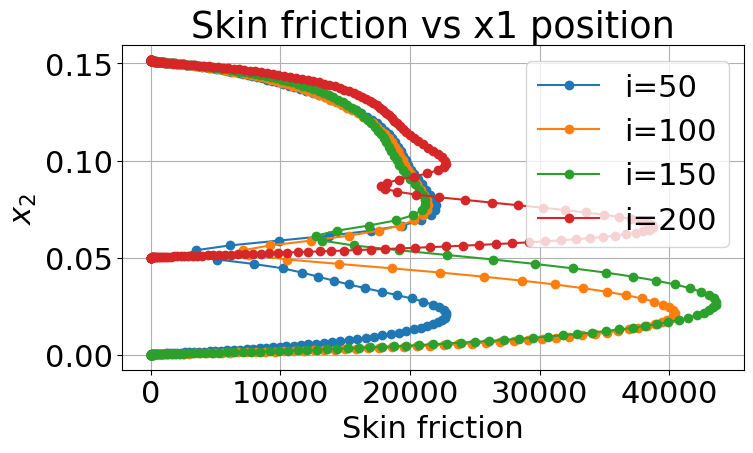

In [107]:
plt.figure(figsize=(8,5))
i=50
plt.plot(ratio[i,:], x2_2d[i,:], 'o-', label='i=50')  # detail x1 position
i=100
plt.plot(ratio[i,:], x2_2d[i,:], 'o-', label='i=100')  # detail x1 position
i=150
plt.plot(ratio[i,:], x2_2d[i,:], 'o-', label='i=150')  # detail x1 position
i=199
plt.plot(ratio[i,:], x2_2d[i,:], 'o-', label='i=200')  # detail x1 position
plt.ylabel('$x_2$')
plt.xlabel('Skin friction')
plt.title('Skin friction vs x1 position')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()



Data type of wall_shear_stresses_top: float64
(200,)
(200,)
(200,)
(200, 202)


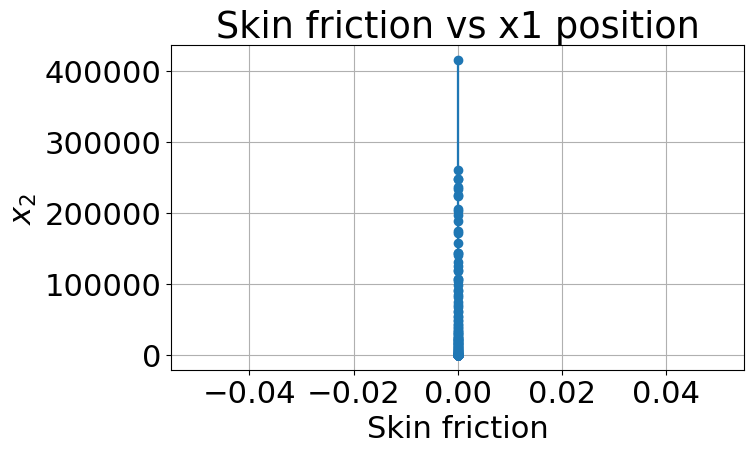

In [121]:
column_to_extract = 0 # The first column which contains Ustar


df = pd.read_csv('InternalTableBottom.csv')


Ustar_bottom= df.iloc[:, column_to_extract].to_numpy()

print(f"Data type of wall_shear_stresses_top: {Ustar_bottom.dtype}")

print(np.shape(Ustar_bottom))
print(np.shape(x2_2d[:, 0]))


x2plus_bottom = (Ustar_bottom * x2_2d[:, 0]) / (mu / rho)

print(np.shape(x2plus_bottom))
print(np.shape(ratio))


plt.figure(figsize=(8,5))
plt.plot(ratio[:,0], x2plus_bottom, 'o-')  # detail x1 position
plt.ylabel('$x_2$')
plt.xlabel('Skin friction')
plt.title('Skin friction vs x1 position')
plt.grid(True)
plt.tight_layout()
plt.show()